# Análise: Polpa congelada + Purê de manga asséptico

Análise combinada tratando **Polpa congelada** e **Purê de manga asséptico** como um único produto/categoria.

Objetivo: entender o perfil conjunto desses dois produtos similares em relação ao restante da base de dados.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

In [30]:
# Carregar base tratada
df = pd.read_csv('BASE_1_Manga_Produtos_TRATADA.csv')
print(f"Total de registros: {len(df)}")
print(f"\nProdutos únicos: {df['produto'].nunique()}")
df.head()

Total de registros: 1700

Produtos únicos: 30


,empresa,faturamento_empresa_brl,produto,tipo_cliente,mercado_principal,indice_concorrencia_1a5,indice_valor_agregado_1a5,margem_media_percentual,indice_complexidade_produtiva_1a5,indice_capex_1a5,indice_escalabilidade_1a5,indice_exigencia_regulatoria_1a5,certificacoes_principais,indice_compatibilidade_refugo_1a5,indice_compatibilidade_operacao_fazenda_1a5,miss__empresa,miss__faturamento_empresa_brl,miss__produto,miss__tipo_cliente,miss__mercado_principal,miss__indice_concorrencia_1a5,miss__indice_valor_agregado_1a5,miss__margem_media_percentual,miss__indice_complexidade_produtiva_1a5,miss__indice_capex_1a5,miss__indice_escalabilidade_1a5,miss__indice_exigencia_regulatoria_1a5,miss__certificacoes_principais,miss__indice_compatibilidade_refugo_1a5,miss__indice_compatibilidade_operacao_fazenda_1a5
0,BRF Ingredients,5.300000e+10,Sorbet / picolé,B2B,Interno,2.0,3.5,45.66,4.0,1.0,1.0,3.0,ANVISA,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ambev (bebidas),7.200000e+10,Purê de manga asséptico,B2C,Externo,2.0,3.0,12.79,3.0,1.0,3.0,3.0,ANVISA,1.0,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Bunge Brasil,9.500000e+10,Biocomposto / fertilizante orgânico,B2B,Externo,4.0,2.0,12.31,2.0,3.0,3.0,2.0,ANVISA,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MangaVale Alimentos,4.800000e+08,Sabonete / hidratante com manga,B2B,Ambos,1.0,2.5,37.29,3.0,2.0,1.0,2.0,MAPA,2.0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Cutrale,3.000000e+10,Corante natural,B2B,Interno,3.0,3.5,13.45,4.0,2.0,4.0,3.0,MAPA,2.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 1. Criar categoria combinada

Criamos uma nova coluna que agrupa **Polpa congelada** e **Purê de manga asséptico** como uma categoria única.

In [31]:
# Criar categoria combinada
df['categoria_produto'] = df['produto'].copy()
df.loc[df['produto'].isin(['Polpa congelada', 'Purê de manga asséptico']), 'categoria_produto'] = 'Polpa/Purê (combinado)'

# Separar os dados
polpa_pure = df[df['categoria_produto'] == 'Polpa/Purê (combinado)'].copy()
outros = df[df['categoria_produto'] != 'Polpa/Purê (combinado)'].copy()

print(f"Registros de Polpa congelada + Purê asséptico: {len(polpa_pure)}")
print(f"Registros de outros produtos: {len(outros)}")
print(f"\nDistribuição dentro da categoria combinada:")
print(polpa_pure['produto'].value_counts())
print(f"\nPrimeiros registros da categoria combinada:")
polpa_pure[['empresa', 'produto', 'tipo_cliente', 'mercado_principal', 'margem_media_percentual']].head(10)

Registros de Polpa congelada + Purê asséptico: 119
Registros de outros produtos: 1581

Distribuição dentro da categoria combinada:
produto
Polpa congelada            60
Purê de manga asséptico    59
Name: count, dtype: int64

Primeiros registros da categoria combinada:


,empresa,produto,tipo_cliente,mercado_principal,margem_media_percentual
1,Ambev (bebidas),Purê de manga asséptico,B2C,Externo,12.790000
21,MangaVale Alimentos,Purê de manga asséptico,B2B,Externo,14.100000
33,Duas Rodas,Polpa congelada,B2B,Interno,42.770000
46,Nao informado,Polpa congelada,B2C,Ambos,33.900000
53,BRF Ingredients,Polpa congelada,B2B,Ambos,17.560000
56,MangaVale Alimentos,Purê de manga asséptico,B2B,Interno,39.580000
58,Kerry do Brasil,Purê de manga asséptico,B2B,Externo,25.740000
73,BioManga Circular,Polpa congelada,B2C,Interno,20.553938
86,Citrosuco,Purê de manga asséptico,B2B,Interno,20.540000
92,JBS Ingredients,Polpa congelada,B2B,Interno,40.192527


## 2. Comparação numérica: Polpa/Purê vs restante da base

Análise das métricas numéricas comparando a categoria combinada com o restante da base.

In [32]:
# Colunas numéricas principais
cols_num = ['faturamento_empresa_brl', 'indice_concorrencia_1a5', 'indice_valor_agregado_1a5',
            'margem_media_percentual', 'indice_complexidade_produtiva_1a5', 'indice_capex_1a5',
            'indice_escalabilidade_1a5', 'indice_exigencia_regulatoria_1a5',
            'indice_compatibilidade_refugo_1a5', 'indice_compatibilidade_operacao_fazenda_1a5']

# Comparação de médias
comp = pd.DataFrame({
    'Polpa/Purê (média)': polpa_pure[cols_num].mean(),
    'Restante da base (média)': outros[cols_num].mean(),
})
comp['Diferença'] = comp['Polpa/Purê (média)'] - comp['Restante da base (média)']
comp['Diferença %'] = (comp['Diferença'] / comp['Restante da base (média)'] * 100).round(2)
comp['Em relação à base'] = comp['Diferença'].apply(
    lambda x: 'Acima' if x > 0 else ('Abaixo' if x < 0 else 'Igual'))

comp.round(2)

,Polpa/Purê (média),Restante da base (média),Diferença,Diferença %,Em relação à base
faturamento_empresa_brl,4.303622e+10,4.163030e+10,1.405915e+09,3.38,Acima
indice_concorrencia_1a5,2.810000e+00,3.000000e+00,-1.900000e-01,-6.44,Abaixo
indice_valor_agregado_1a5,2.850000e+00,2.910000e+00,-5.000000e-02,-1.83,Abaixo
margem_media_percentual,2.929000e+01,2.830000e+01,9.900000e-01,3.49,Acima
indice_complexidade_produtiva_1a5,3.060000e+00,3.040000e+00,2.000000e-02,0.71,Acima
indice_capex_1a5,2.840000e+00,2.820000e+00,2.000000e-02,0.64,Acima
indice_escalabilidade_1a5,2.970000e+00,3.050000e+00,-7.000000e-02,-2.36,Abaixo
indice_exigencia_regulatoria_1a5,2.650000e+00,2.770000e+00,-1.300000e-01,-4.60,Abaixo
indice_compatibilidade_refugo_1a5,2.300000e+00,2.290000e+00,1.000000e-02,0.34,Acima
indice_compatibilidade_operacao_fazenda_1a5,2.610000e+00,2.580000e+00,3.000000e-02,1.27,Acima


In [33]:
# Estatísticas descritivas completas
print("=== POLPA/PURÊ (COMBINADO) ===")
desc_polpa_pure = polpa_pure[cols_num].describe()
print(desc_polpa_pure.round(2))
print("\n=== RESTANTE DA BASE ===")
desc_outros = outros[cols_num].describe()
print(desc_outros.round(2))

=== POLPA/PURÊ (COMBINADO) ===
       faturamento_empresa_brl  indice_concorrencia_1a5  \
count             1.190000e+02                   119.00   
mean              4.303622e+10                     2.81   
std               7.416360e+10                     1.02   
min               1.200000e+08                     1.00   
25%               4.800000e+08                     2.00   
50%               9.000000e+09                     3.00   
75%               7.200000e+10                     3.00   
max               3.750000e+11                     5.00   

       indice_valor_agregado_1a5  margem_media_percentual  \
count                     119.00                   119.00   
mean                        2.85                    29.29   
std                         0.76                    11.01   
min                         1.00                     9.41   
25%                         2.50                    18.73   
50%                         3.00                    30.19   
75%       

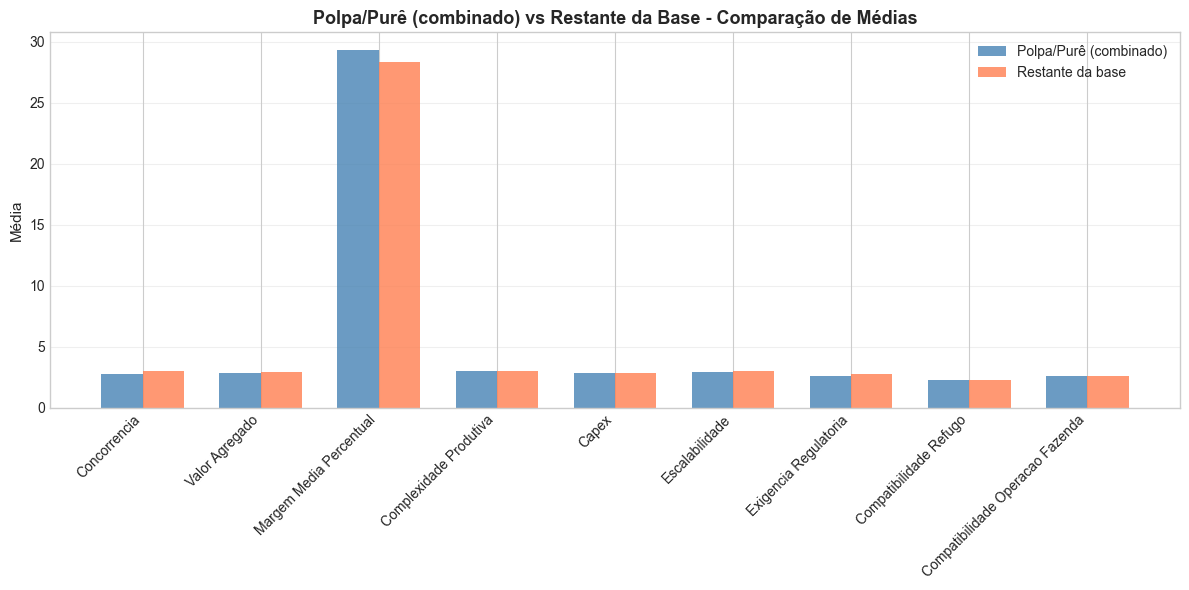

In [34]:
# Visualização: comparação das médias
indices = [c for c in cols_num if 'indice' in c or c == 'margem_media_percentual']
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(indices))
w = 0.35
ax.bar(x - w/2, comp.loc[indices, 'Polpa/Purê (média)'], w, label='Polpa/Purê (combinado)', color='steelblue', alpha=0.8)
ax.bar(x + w/2, comp.loc[indices, 'Restante da base (média)'], w, label='Restante da base', color='coral', alpha=0.8)
ax.set_xticks(x)
ax.set_xticklabels([c.replace('indice_', '').replace('_1a5', '').replace('_', ' ').title() for c in indices], 
                    rotation=45, ha='right')
ax.set_ylabel('Média', fontsize=11)
ax.legend(fontsize=10)
ax.set_title('Polpa/Purê (combinado) vs Restante da Base - Comparação de Médias', fontsize=13, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

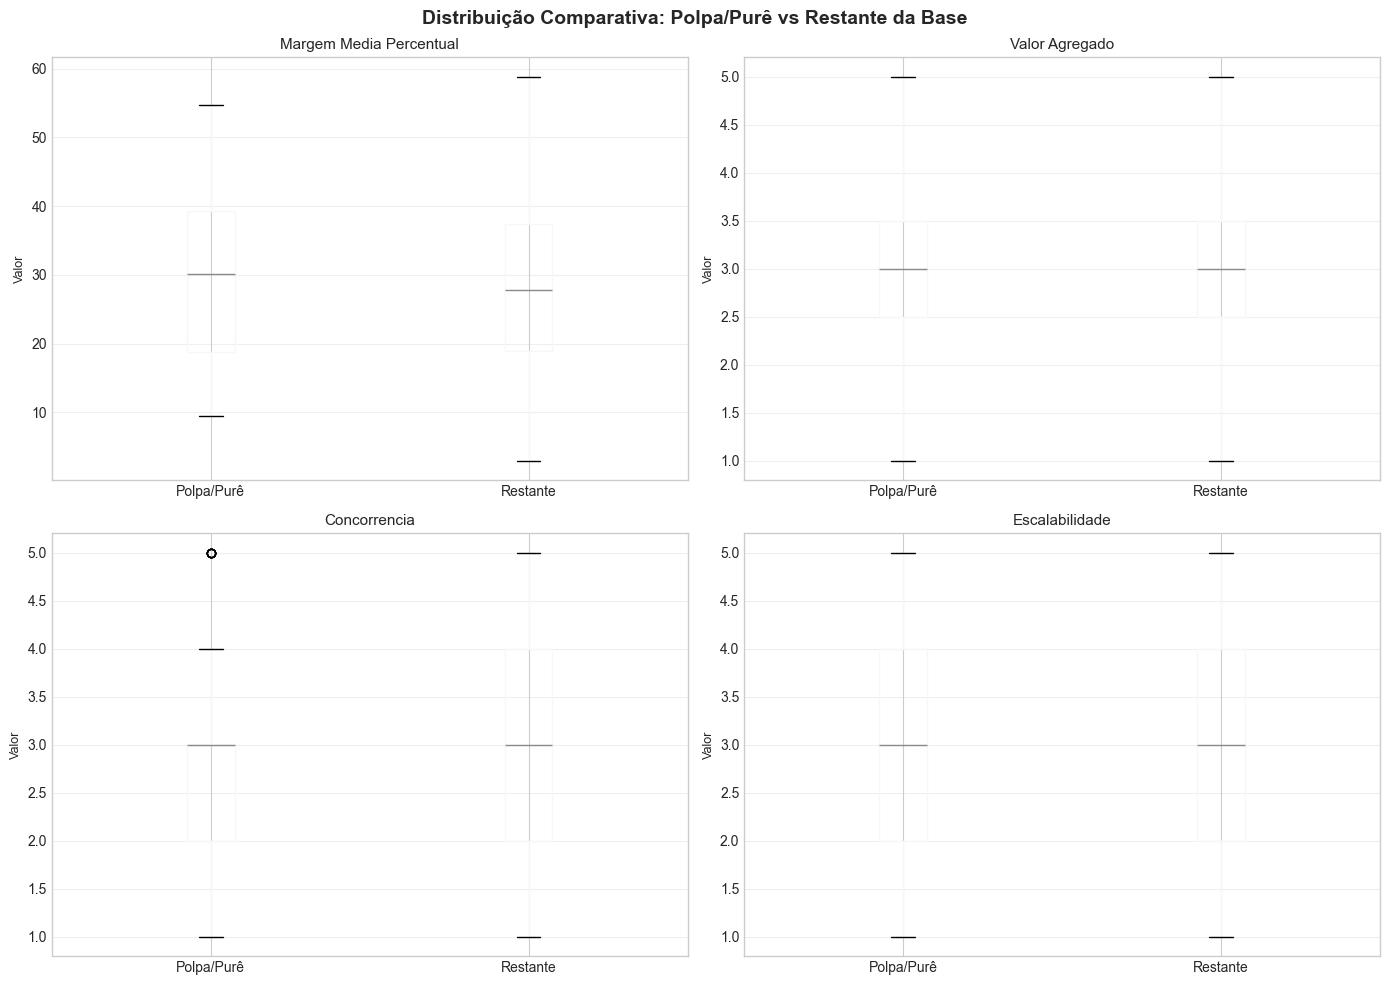

In [35]:
# Boxplot comparativo para algumas métricas chave
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

metricas_chave = [
    'margem_media_percentual',
    'indice_valor_agregado_1a5',
    'indice_concorrencia_1a5',
    'indice_escalabilidade_1a5'
]

for ax, metrica in zip(axes, metricas_chave):
    # Séries com índice resetado (evita desalinhamento estranho) + NaN ok
    s_polpa = polpa_pure[metrica].reset_index(drop=True)
    s_outros = outros[metrica].reset_index(drop=True)

    dados_comp = pd.concat(
        [s_polpa.rename('Polpa/Purê'), s_outros.rename('Restante')],
        axis=1
    )

    dados_comp.boxplot(ax=ax)
    ax.set_title(metrica.replace('indice_', '').replace('_1a5', '').replace('_', ' ').title(), fontsize=11)
    ax.set_ylabel('Valor', fontsize=9)
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Distribuição Comparativa: Polpa/Purê vs Restante da Base', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Análise de colunas categóricas

Perfil da categoria combinada em relação a tipo de cliente, mercado e certificações.

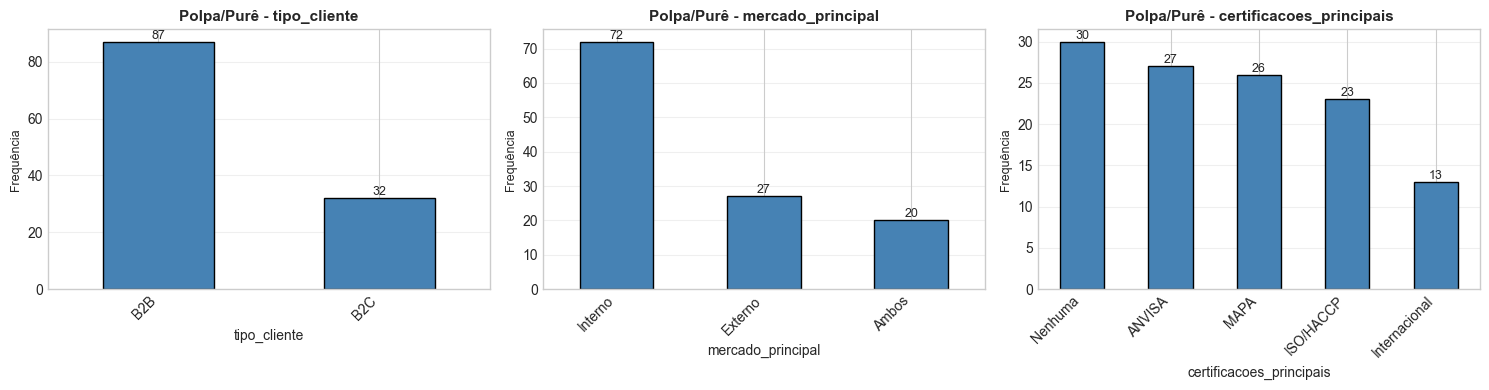

In [36]:
# Distribuição categórica - Polpa/Purê
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col in zip(axes, ['tipo_cliente', 'mercado_principal', 'certificacoes_principais']):
    contagem = polpa_pure[col].value_counts()
    contagem.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
    ax.set_title(f'Polpa/Purê - {col}', fontsize=11, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylabel('Frequência', fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, v in enumerate(contagem.values):
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [37]:
# Comparação percentual tipo_cliente e mercado_principal
print('=' * 60)
print('COMPARAÇÃO: POLPA/PURÊ vs RESTANTE DA BASE')
print('=' * 60)

print('\n--- TIPO DE CLIENTE ---')
print('\nPolpa/Purê (combinado):')
print(polpa_pure['tipo_cliente'].value_counts(normalize=True).round(3) * 100)
print('\nRestante da base:')
print(outros['tipo_cliente'].value_counts(normalize=True).round(3) * 100)

print('\n--- MERCADO PRINCIPAL ---')
print('\nPolpa/Purê (combinado):')
print(polpa_pure['mercado_principal'].value_counts(normalize=True).round(3) * 100)
print('\nRestante da base:')
print(outros['mercado_principal'].value_counts(normalize=True).round(3) * 100)

print('\n--- CERTIFICAÇÕES PRINCIPAIS ---')
print('\nPolpa/Purê (combinado):')
print(polpa_pure['certificacoes_principais'].value_counts(normalize=True).round(3) * 100)
print('\nRestante da base:')
print(outros['certificacoes_principais'].value_counts(normalize=True).round(3) * 100)

COMPARAÇÃO: POLPA/PURÊ vs RESTANTE DA BASE

--- TIPO DE CLIENTE ---

Polpa/Purê (combinado):
tipo_cliente
B2B    73.1
B2C    26.9
Name: proportion, dtype: float64

Restante da base:
tipo_cliente
B2B              73.7
B2C              26.2
Nao informado     0.1
Name: proportion, dtype: float64

--- MERCADO PRINCIPAL ---

Polpa/Purê (combinado):
mercado_principal
Interno    60.5
Externo    22.7
Ambos      16.8
Name: proportion, dtype: float64

Restante da base:
mercado_principal
Interno          50.0
Externo          25.4
Ambos            24.2
Nao informado     0.4
Name: proportion, dtype: float64

--- CERTIFICAÇÕES PRINCIPAIS ---

Polpa/Purê (combinado):
certificacoes_principais
Nenhuma          25.2
ANVISA           22.7
MAPA             21.8
ISO/HACCP        19.3
Internacional    10.9
Name: proportion, dtype: float64

Restante da base:
certificacoes_principais
MAPA             25.6
Nenhuma          24.5
ISO/HACCP        20.5
ANVISA           19.8
Internacional     9.2
Nao informado   

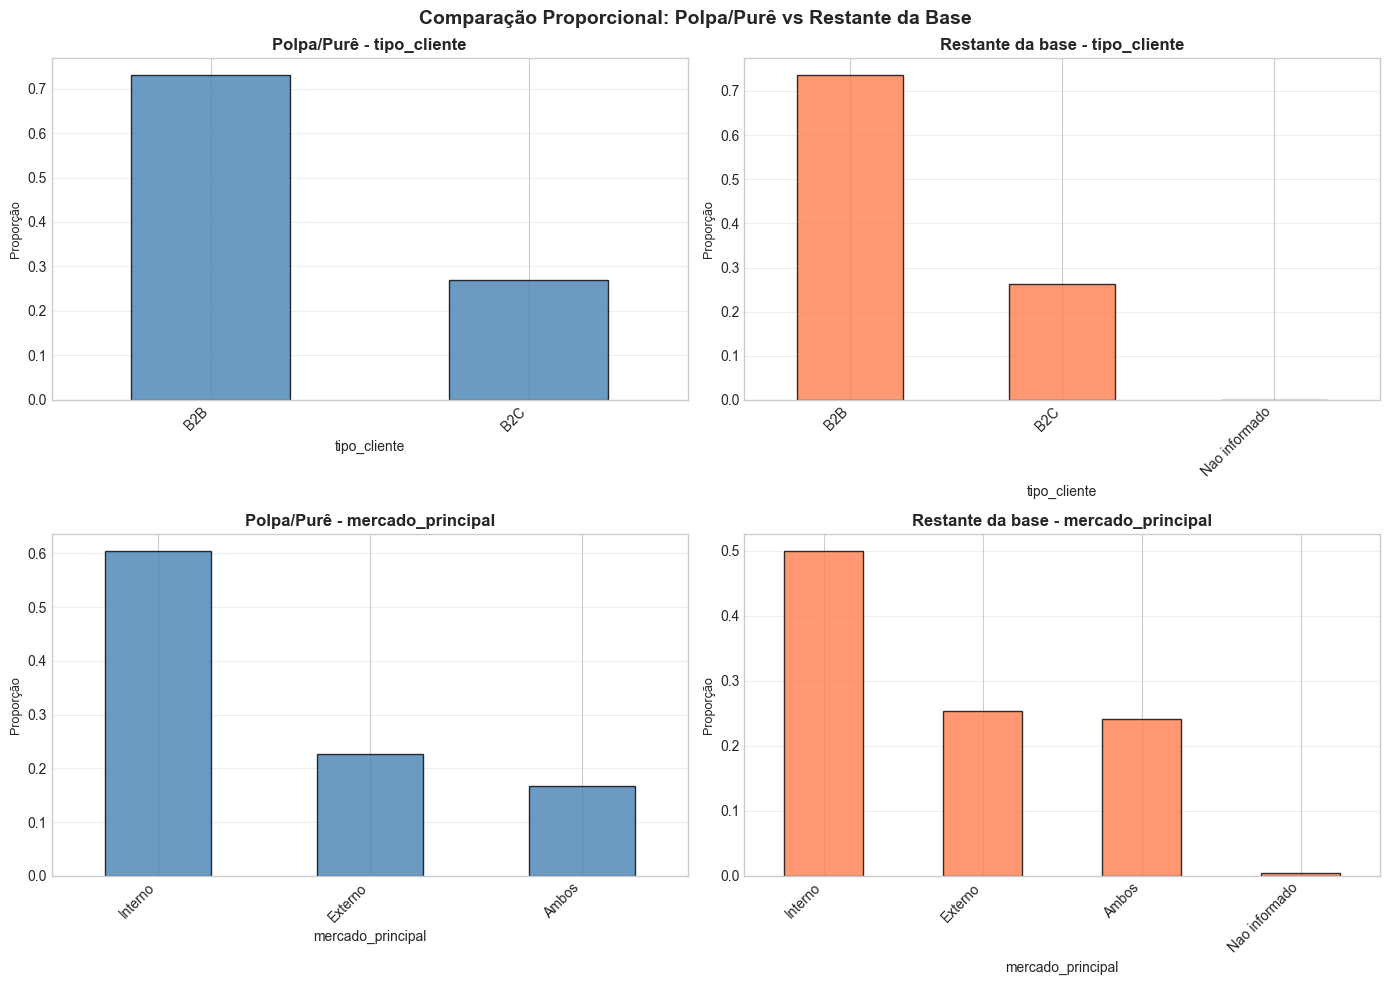

In [38]:
# Visualização comparativa lado a lado
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

categorias = ['tipo_cliente', 'mercado_principal']
for idx, cat in enumerate(categorias):
    # Polpa/Purê
    polpa_pure[cat].value_counts(normalize=True).plot(kind='bar', ax=axes[idx*2], 
                                                      color='steelblue', alpha=0.8, edgecolor='black')
    axes[idx*2].set_title(f'Polpa/Purê - {cat}', fontweight='bold')
    axes[idx*2].set_ylabel('Proporção', fontsize=9)
    axes[idx*2].set_xticklabels(axes[idx*2].get_xticklabels(), rotation=45, ha='right')
    axes[idx*2].grid(axis='y', alpha=0.3)
    
    # Restante
    outros[cat].value_counts(normalize=True).plot(kind='bar', ax=axes[idx*2+1], 
                                                  color='coral', alpha=0.8, edgecolor='black')
    axes[idx*2+1].set_title(f'Restante da base - {cat}', fontweight='bold')
    axes[idx*2+1].set_ylabel('Proporção', fontsize=9)
    axes[idx*2+1].set_xticklabels(axes[idx*2+1].get_xticklabels(), rotation=45, ha='right')
    axes[idx*2+1].grid(axis='y', alpha=0.3)

plt.suptitle('Comparação Proporcional: Polpa/Purê vs Restante da Base', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Análise interna: Polpa congelada vs Purê asséptico

Comparação entre os dois produtos que compõem a categoria combinada.

In [39]:
# Separar Polpa congelada e Purê asséptico
polpa = polpa_pure[polpa_pure['produto'] == 'Polpa congelada'].copy()
pure = polpa_pure[polpa_pure['produto'] == 'Purê de manga asséptico'].copy()

print(f"Registros de Polpa congelada: {len(polpa)}")
print(f"Registros de Purê asséptico: {len(pure)}")

# Comparação entre eles
comp_interna = pd.DataFrame({
    'Polpa congelada (média)': polpa[cols_num].mean(),
    'Purê asséptico (média)': pure[cols_num].mean(),
})
comp_interna['Diferença'] = comp_interna['Polpa congelada (média)'] - comp_interna['Purê asséptico (média)']
comp_interna.round(2)

Registros de Polpa congelada: 60
Registros de Purê asséptico: 59


,Polpa congelada (média),Purê asséptico (média),Diferença
faturamento_empresa_brl,4.279667e+10,4.327983e+10,-4.831638e+08
indice_concorrencia_1a5,2.630000e+00,2.980000e+00,-3.500000e-01
indice_valor_agregado_1a5,2.750000e+00,2.960000e+00,-2.100000e-01
margem_media_percentual,2.755000e+01,3.106000e+01,-3.510000e+00
indice_complexidade_produtiva_1a5,2.930000e+00,3.190000e+00,-2.500000e-01
indice_capex_1a5,3.020000e+00,2.660000e+00,3.600000e-01
indice_escalabilidade_1a5,3.020000e+00,2.930000e+00,8.000000e-02
indice_exigencia_regulatoria_1a5,2.570000e+00,2.730000e+00,-1.600000e-01
indice_compatibilidade_refugo_1a5,2.270000e+00,2.340000e+00,-7.000000e-02
indice_compatibilidade_operacao_fazenda_1a5,2.580000e+00,2.640000e+00,-6.000000e-02


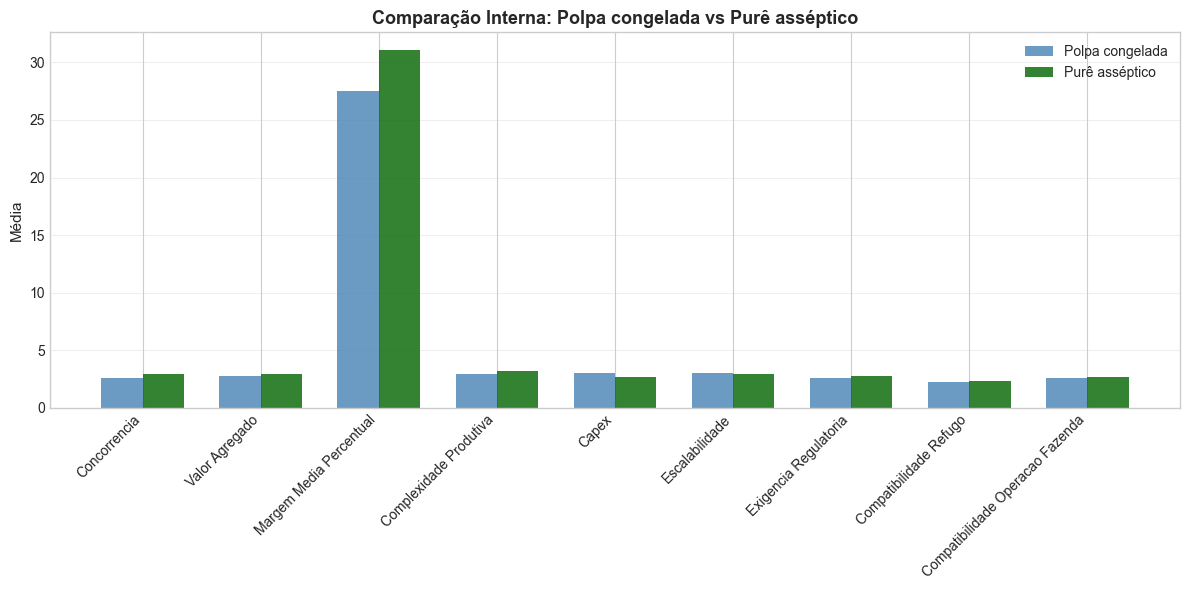

In [40]:
# Visualização da comparação interna
indices = [c for c in cols_num if 'indice' in c or c == 'margem_media_percentual']
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(indices))
w = 0.35
ax.bar(x - w/2, comp_interna.loc[indices, 'Polpa congelada (média)'], w, 
       label='Polpa congelada', color='steelblue', alpha=0.8)
ax.bar(x + w/2, comp_interna.loc[indices, 'Purê asséptico (média)'], w, 
       label='Purê asséptico', color='darkgreen', alpha=0.8)
ax.set_xticks(x)
ax.set_xticklabels([c.replace('indice_', '').replace('_1a5', '').replace('_', ' ').title() for c in indices], 
                    rotation=45, ha='right')
ax.set_ylabel('Média', fontsize=11)
ax.legend(fontsize=10)
ax.set_title('Comparação Interna: Polpa congelada vs Purê asséptico', fontsize=13, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Vantagens e Desvantagens da categoria Polpa/Purê

Síntese automática baseada nas comparações numéricas.

In [41]:
# Interpretação automática baseada na direção "melhor" de cada indicador
melhor_quando_menor = ['indice_concorrencia_1a5', 'indice_capex_1a5', 'indice_exigencia_regulatoria_1a5', 
                       'indice_complexidade_produtiva_1a5']
melhor_quando_maior = ['indice_valor_agregado_1a5', 'margem_media_percentual', 
                       'indice_compatibilidade_refugo_1a5', 'indice_compatibilidade_operacao_fazenda_1a5',
                       'indice_escalabilidade_1a5']

vantagens = []
desvantagens = []

for c in melhor_quando_menor:
    if c in comp.index:
        d = comp.loc[c, 'Diferença']
        media_polpa = comp.loc[c, 'Polpa/Purê (média)']
        media_base = comp.loc[c, 'Restante da base (média)']
        if d < 0:
            vantagens.append(f"{c.replace('indice_', '').replace('_1a5', '').replace('_', ' ').title()}: "
                           f"Polpa/Purê tem média menor ({media_polpa:.2f} vs {media_base:.2f}) - Vantagem")
        elif d > 0:
            desvantagens.append(f"{c.replace('indice_', '').replace('_1a5', '').replace('_', ' ').title()}: "
                             f"Polpa/Purê tem média maior ({media_polpa:.2f} vs {media_base:.2f}) - Desvantagem")

for c in melhor_quando_maior:
    if c in comp.index:
        d = comp.loc[c, 'Diferença']
        media_polpa = comp.loc[c, 'Polpa/Purê (média)']
        media_base = comp.loc[c, 'Restante da base (média)']
        if d > 0:
            vantagens.append(f"{c.replace('indice_', '').replace('_1a5', '').replace('_', ' ').title()}: "
                           f"Polpa/Purê tem média maior ({media_polpa:.2f} vs {media_base:.2f}) - Vantagem")
        elif d < 0:
            desvantagens.append(f"{c.replace('indice_', '').replace('_1a5', '').replace('_', ' ').title()}: "
                             f"Polpa/Purê tem média menor ({media_polpa:.2f} vs {media_base:.2f}) - Desvantagem")

print('=' * 80)
print('VANTAGENS DA CATEGORIA POLPA/PURÊ (em relação ao restante da base)')
print('=' * 80)
if vantagens:
    for i, v in enumerate(vantagens, 1):
        print(f"{i}. {v}")
else:
    print("Nenhuma vantagem identificada.")

print('\n' + '=' * 80)
print('DESVANTAGENS DA CATEGORIA POLPA/PURÊ (em relação ao restante da base)')
print('=' * 80)
if desvantagens:
    for i, d in enumerate(desvantagens, 1):
        print(f"{i}. {d}")
else:
    print("Nenhuma desvantagem identificada.")

VANTAGENS DA CATEGORIA POLPA/PURÊ (em relação ao restante da base)
1. Concorrencia: Polpa/Purê tem média menor (2.81 vs 3.00) - Vantagem
2. Exigencia Regulatoria: Polpa/Purê tem média menor (2.65 vs 2.77) - Vantagem
3. Margem Media Percentual: Polpa/Purê tem média maior (29.29 vs 28.30) - Vantagem
4. Compatibilidade Refugo: Polpa/Purê tem média maior (2.30 vs 2.29) - Vantagem
5. Compatibilidade Operacao Fazenda: Polpa/Purê tem média maior (2.61 vs 2.58) - Vantagem

DESVANTAGENS DA CATEGORIA POLPA/PURÊ (em relação ao restante da base)
1. Capex: Polpa/Purê tem média maior (2.84 vs 2.82) - Desvantagem
2. Complexidade Produtiva: Polpa/Purê tem média maior (3.06 vs 3.04) - Desvantagem
3. Valor Agregado: Polpa/Purê tem média menor (2.85 vs 2.91) - Desvantagem
4. Escalabilidade: Polpa/Purê tem média menor (2.97 vs 3.05) - Desvantagem


## 6. Resumo executivo

Principais insights da análise combinada.

In [ ]:
print('=' * 80)
print('RESUMO EXECUTIVO: POLPA CONGELADA + PURÊ DE MANGA ASSÉPTICO')
print('=' * 80)

print(f"\n TAMANHO DA AMOSTRA:")
print(f"   • Categoria combinada: {len(polpa_pure)} registros ({len(polpa_pure)/len(df)*100:.1f}% da base)")
print(f"     - Polpa congelada: {len(polpa)} registros")
print(f"     - Purê asséptico: {len(pure)} registros")
print(f"   • Restante da base: {len(outros)} registros ({len(outros)/len(df)*100:.1f}% da base)")

print(f"\n MARGEM MÉDIA:")
margem_polpa = comp.loc['margem_media_percentual', 'Polpa/Purê (média)']
margem_base = comp.loc['margem_media_percentual', 'Restante da base (média)']
diff_margem = comp.loc['margem_media_percentual', 'Diferença']
print(f"   • Polpa/Purê: {margem_polpa:.2f}%")
print(f"   • Restante da base: {margem_base:.2f}%")
print(f"   • Diferença: {diff_margem:+.2f} pontos percentuais")

print(f"\n PERFIL DE MERCADO:")
tipo_mais_comum = polpa_pure['tipo_cliente'].mode()[0]
mercado_mais_comum = polpa_pure['mercado_principal'].mode()[0]
print(f"   • Tipo de cliente predominante: {tipo_mais_comum} ({polpa_pure['tipo_cliente'].value_counts()[tipo_mais_comum]/len(polpa_pure)*100:.1f}%)")
print(f"   • Mercado principal predominante: {mercado_mais_comum} ({polpa_pure['mercado_principal'].value_counts()[mercado_mais_comum]/len(polpa_pure)*100:.1f}%)")

print(f"\n PRINCIPAIS DIFERENÇAS EM RELAÇÃO À BASE:")
print(f"   • {len(vantagens)} vantagens identificadas")
print(f"   • {len(desvantagens)} desvantagens identificadas")

print('\n' + '=' * 80)

RESUMO EXECUTIVO: POLPA CONGELADA + PURÊ DE MANGA ASSÉPTICO

 TAMANHO DA AMOSTRA:
   • Categoria combinada: 119 registros (7.0% da base)
     - Polpa congelada: 60 registros
     - Purê asséptico: 59 registros
   • Restante da base: 1581 registros (93.0% da base)

 MARGEM MÉDIA:
   • Polpa/Purê: 29.29%
   • Restante da base: 28.30%
   • Diferença: +0.99 pontos percentuais

 PERFIL DE MERCADO:
   • Tipo de cliente predominante: B2B (73.1%)
   • Mercado principal predominante: Interno (60.5%)

 PRINCIPAIS DIFERENÇAS EM RELAÇÃO À BASE:
   • 5 vantagens identificadas
   • 4 desvantagens identificadas



: 